In [1]:
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

from trial_class import *
from experiment_class import Experiment

import numpy as np
import pandas as pd
import tdt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from scipy.signal import butter, filtfilt
from sklearn.linear_model import LinearRegression
from hd_extension import *

In [2]:
experiment_path = r"/Users/naylajimenez/Downloads/papers/dopamine/cohort 1 + 2/C1_2_Hab_Dishab/mpfc"
csv_base_path = r"/Users/naylajimenez/Downloads/papers/dopamine/cohort 1 + 2/C1_2_Hab_Dishab/mpfc_csvs"
brain_region = '#FFAF00'

In [3]:
# groups csv + experiment data into one variable
experiment = Experiment(experiment_path, csv_base_path)

# batch process the data, removing the specified time segments for subjects
experiment.default_batch_process()

Found Synapse note file: /Users/naylajimenez/Downloads/papers/dopamine/cohort 1 + 2/C1_2_Hab_Dishab/mpfc/p7-240821-111323/Notes.txt
read from t=0s to t=1325.21s
Found Synapse note file: /Users/naylajimenez/Downloads/papers/dopamine/cohort 1 + 2/C1_2_Hab_Dishab/mpfc/p5-240821-092649/Notes.txt
read from t=0s to t=1326.46s
Found Synapse note file: /Users/naylajimenez/Downloads/papers/dopamine/cohort 1 + 2/C1_2_Hab_Dishab/mpfc/p1-240516-064158/Notes.txt
read from t=0s to t=1547.64s
Found Synapse note file: /Users/naylajimenez/Downloads/papers/dopamine/cohort 1 + 2/C1_2_Hab_Dishab/mpfc/p8-240821-121933/Notes.txt
read from t=0s to t=1315.26s
Found Synapse note file: /Users/naylajimenez/Downloads/papers/dopamine/cohort 1 + 2/C1_2_Hab_Dishab/mpfc/p6-240821-103616/Notes.txt
read from t=0s to t=1322.66s
Found Synapse note file: /Users/naylajimenez/Downloads/papers/dopamine/cohort 1 + 2/C1_2_Hab_Dishab/mpfc/p4-240516-083255/Notes.txt
read from t=0s to t=1773.98s
Found Synapse note file: /Users/na

In [4]:
bout_definitions = [
    {'prefix': 's1', 'introduced': 's1_Introduced', 'removed': 's1_Removed'},
    {'prefix': 's2', 'introduced': 's2_Introduced', 'removed': 's2_Removed'}
]

experiment.group_extract_manual_annotations(bout_definitions)

Processing behaviors for p7-240821-111323...
Processing behaviors for p5-240821-092649...
Processing behaviors for p1-240516-064158...
Processing behaviors for p8-240821-121933...
Processing behaviors for p6-240821-103616...
Processing behaviors for p4-240516-083255...
Processing behaviors for p2-240516-071921...
Processing behaviors for p3-240516-075659...


# Total Investigation Time & Average Bout Duration

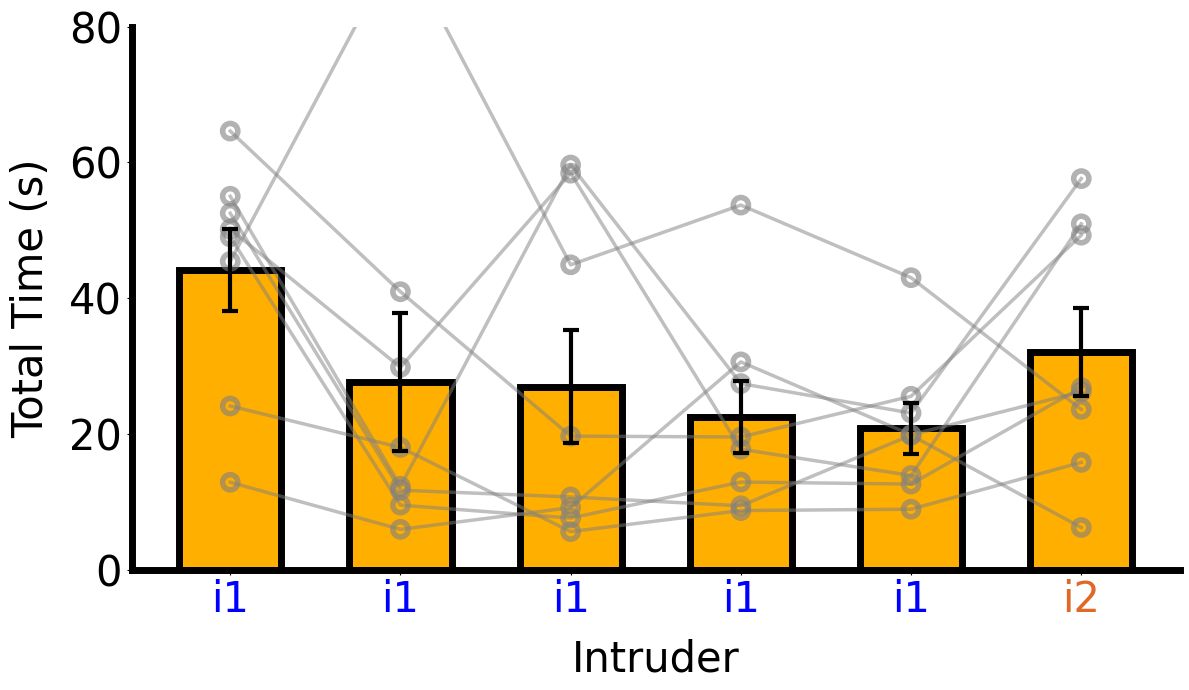

In [5]:
nn1 = experiment.trials['p1-240516-064158']
nn2 = experiment.trials['p2-240516-071921']
nn3 = experiment.trials['p3-240516-075659']
nn4 = experiment.trials['p4-240516-083255']
nn5 = experiment.trials['p5-240821-092649']
nn6 = experiment.trials['p6-240821-103616']
nn7 = experiment.trials['p7-240821-111323']
nn8 = experiment.trials['p8-240821-121933']

# Read each CSV into a DataFrame
df1 = nn1.behaviors
df2 = nn2.behaviors
df3 = nn3.behaviors
df4 = nn4.behaviors
df5 = nn5.behaviors
df6 = nn6.behaviors
df7 = nn7.behaviors
df8 = nn8.behaviors

# Create a list of the DataFrames
trials = [df1, df2, df3, df4, df5, df6, df7, df8]

# Create one combined summary DataFrame (7 subjects total)
summary_df = create_subject_summary_df(trials)

# --- Behavior Processing for Each Subject ---
for nn in [nn1, nn2, nn3, nn4, nn5, nn6, nn7]:
    # Merge consecutive Investigation events that occur within 1 second.
    nn.combine_consecutive_behaviors(behavior_name='Approach', bout_time_threshold=1)
    # Remove Investigation events shorter than 0.5 seconds (or adjust as needed).
    nn.remove_short_behaviors(behavior_name='Approach', min_duration=0.5)
    
# --- Filter Summary DataFrame by Specific Bouts ---
desired_bouts = ["s1-1", "s1-2", "s1-3", "s1-4", "s1-5", "s2-1"]
filtered_summary_df = summary_df[summary_df["Bout"].isin(desired_bouts)]

# get rid of 5
# filtered_df = filtered_summary_df[filtered_summary_df['Subject'] != 5]

# Group by Subject and Bout and sum Duration (s) to ensure unique pairs
grouped_df = filtered_summary_df.groupby(["Subject", "Bout"], as_index=False)["Duration (s)"].sum()

# Pivot the grouped DataFrame so that rows are subjects and columns are bouts
pivot_df = grouped_df.pivot(index="Subject", columns="Bout", values="Duration (s)")
pivot_df = pivot_df.fillna(0)  # Fill missing values with 0

# Then call your plotting function
plot_y_across_bouts_gray(
    df=pivot_df,
    title=None,
    ylabel="Total Time (s)",
    custom_xtick_labels=["i1", "i1", "i1", "i1", "i1", "i2"],
    custom_xtick_colors=["blue", "blue", "blue", "blue", "blue", "#E06928"],
    ylim=(0, 80),
    bar_color=brain_region,
    yticks_increment=20,
    xlabel="Intruder",
    figsize=(12,7),
    pad_inches=0.1
)

# Dopamine Analysis

### Global

In [6]:
experiment.group_extract_manual_annotations(bout_definitions=bout_definitions, first = True)

# Proceed with DA metric computation after all files are processed
experiment.compute_all_da_metrics(
    use_fractional=True,       # Enable fractional analysis (limits window to max_bout_duration)
    max_bout_duration=5,       # Set the maximum bout duration to 5 seconds
    use_adaptive=True,         # Enable adaptive peak-following window
    peak_fall_fraction=0.6,    # Set the fall threshold to 60% of the peak
    allow_bout_extension=True, # Allow extending the bout window if needed
    first=True                 # Consider only the first investigation event per bout
)

Processing behaviors for p7-240821-111323...
Processing behaviors for p5-240821-092649...
Processing behaviors for p1-240516-064158...
Processing behaviors for p8-240821-121933...
Processing behaviors for p6-240821-103616...
Processing behaviors for p4-240516-083255...
Processing behaviors for p2-240516-071921...
Processing behaviors for p3-240516-075659...
Computing DA metrics for p7-240821-111323 ...
Computing DA metrics for p5-240821-092649 ...
Computing DA metrics for p1-240516-064158 ...
Computing DA metrics for p8-240821-121933 ...
Computing DA metrics for p6-240821-103616 ...
Computing DA metrics for p4-240516-083255 ...
Computing DA metrics for p2-240516-071921 ...
Computing DA metrics for p3-240516-075659 ...


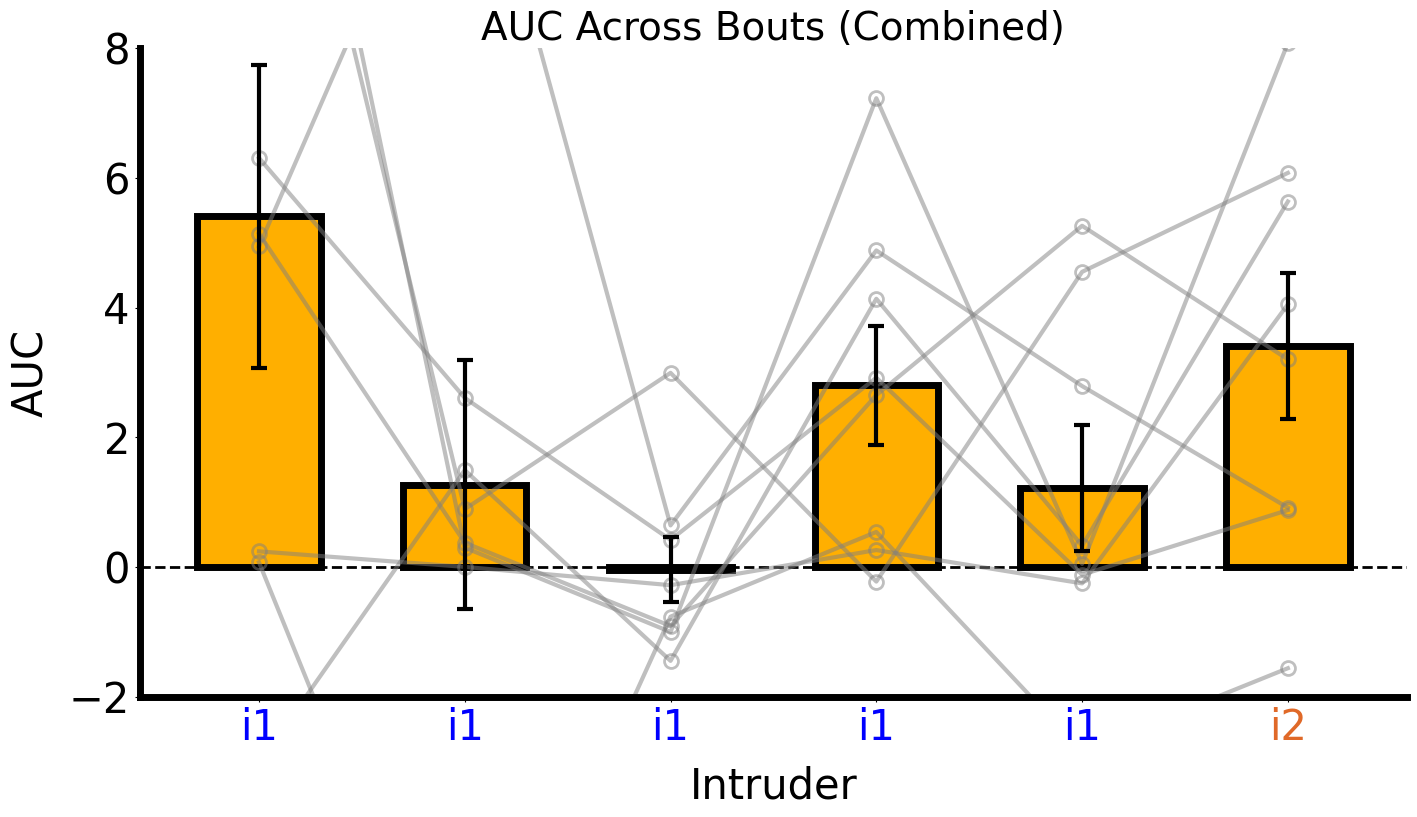

In [90]:
def plot_da_metrics_combined_oneplot_integrated(experiment, 
                                                metric_name="Mean Z-score", 
                                                title="Combined DA Metrics", 
                                                ylabel="DA Metric", 
                                                xlabel="Bout", 
                                                custom_xtick_labels=None, 
                                                custom_xtick_colors=None, 
                                                ylim=None, 
                                                bar_color="#00B7D7", 
                                                yticks_increment=None, 
                                                figsize=(14,8), 
                                                pad_inches=0.1):
    """
    Plots the computed DA metrics across 6 specific bouts for all trials in the experiment.

    Updates:
    - Unfilled circle markers for individual trials
    - Thick grey outlines for visibility

    Parameters:
        - experiment: The experiment object (with a dictionary attribute `trials`).
        - metric_name (str): The DA metric to plot (e.g., "Mean Z-score").
        - title (str): The title for the plot.
        - ylabel (str): The label for the y-axis.
        - xlabel (str): The label for the x-axis.
        - custom_xtick_labels (list): A list of exactly 6 x-tick labels (default: ["i1", "i1", "i1", "i1", "i1", "i2"]).
        - custom_xtick_colors (list): A list of colors for the x-tick labels.
        - ylim (tuple): Y-axis limits.
        - bar_color (str): Color for bars.
        - yticks_increment (float): Increment for y-axis ticks.
        - figsize (tuple): Figure size.
        - pad_inches (float): Padding around the figure.
    """

    # Collect per-trial data (grouped by Bout for the chosen metric)
    trial_data = []
    for trial_name, trial in experiment.trials.items():
        if hasattr(trial, "behaviors") and not trial.behaviors.empty:
            df = trial.behaviors.copy()
            if metric_name not in df.columns:
                print(f"Warning: Trial '{trial_name}' does not contain metric '{metric_name}'. Skipping.")
                continue
            df_grouped = df.groupby("Bout", as_index=False)[metric_name].mean()
            df_grouped["Trial"] = trial_name
            trial_data.append(df_grouped)
        else:
            print(f"Warning: Trial '{trial_name}' has no behavior data.")

    if not trial_data:
        print("No data available to plot.")
        return

    # Combine all trial data into a single DataFrame.
    combined_df = pd.concat(trial_data, ignore_index=True)

    # Select only 6 bouts: first 5 as "i1", last one as "i2"
    selected_bouts = combined_df["Bout"].unique()[:6]
    combined_df = combined_df[combined_df["Bout"].isin(selected_bouts)]

    # Pivot the data for the line plots: rows=Trial, columns=Bout, values=metric_name.
    try:
        pivot_df = combined_df.pivot(index="Trial", columns="Bout", values=metric_name)
    except Exception as e:
        print("Error pivoting data for line plots:", e)
        return
    pivot_df = pivot_df.fillna(0)

    # Compute overall average and SEM for each Bout across all trials.
    overall_stats = combined_df.groupby("Bout")[metric_name].agg(['mean', 'sem']).reset_index()

    # Create the figure and a single axis.
    fig, ax = plt.subplots(figsize=figsize, facecolor="none")  # Transparent background

    # Plot the overall average as a bar chart with error bars.
    ax.bar(overall_stats["Bout"], overall_stats["mean"], yerr=overall_stats["sem"],
           capsize=6, color=bar_color, edgecolor='black', linewidth=5, width=0.6,
           error_kw=dict(elinewidth=3, capthick=3, zorder=5))
    
    # Overlay individual trial lines (all in gray).
    for trial in pivot_df.index:
        ax.plot(pivot_df.columns, pivot_df.loc[trial], linestyle='-', color='gray', 
                alpha=0.5, linewidth=3, marker='o', markerfacecolor='none', markeredgecolor='gray', markeredgewidth=2, markersize=10)

    # Set labels and title.
    ax.set_ylabel(ylabel, fontsize=30, labelpad=12)
    ax.set_xlabel(xlabel, fontsize=30, labelpad=12)
    if title is not None:
        ax.set_title(title, fontsize=28)

    # **Set exactly 6 x-tick labels**
    xtick_labels = ["i1", "i1", "i1", "i1", "i1", "i2"]
    xtick_colors = ["blue", "blue", "blue", "blue", "blue", "#E06928"]

    ax.set_xticks(np.arange(6))
    ax.set_xticklabels(xtick_labels, fontsize=28)

    # Apply custom colors
    for tick, color in zip(ax.get_xticklabels(), xtick_colors):
        tick.set_color(color)

    # Increase tick label sizes.
    ax.tick_params(axis='y', labelsize=30)
    ax.tick_params(axis='x', labelsize=30)
    
    # Set y-limits.
    if ylim is None:
        all_values = np.concatenate([pivot_df.values.flatten(), overall_stats["mean"].values])
        min_val = np.nanmin(all_values)
        max_val = np.nanmax(all_values)
        lower_ylim = 0 if min_val > 0 else min_val * 1.1
        upper_ylim = max_val * 1.1
        ax.set_ylim(lower_ylim, upper_ylim)
        if lower_ylim < 0:
            ax.axhline(0, color='black', linestyle='--', linewidth=2, zorder=1)
    else:
        ax.set_ylim(ylim)
        if ylim[0] < 0:
            ax.axhline(0, color='black', linestyle='--', linewidth=2, zorder=1)
    
    # Set y-ticks based on yticks_increment if provided.
    if yticks_increment is not None:
        y_min, y_max = ax.get_ylim()
        y_ticks = np.arange(np.floor(y_min), np.ceil(y_max) + yticks_increment, yticks_increment)
        ax.set_yticks(y_ticks)
    
    # Remove right and top spines, adjust left and bottom spine width.
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_linewidth(5)
    ax.spines['bottom'].set_linewidth(5)

    plt.tight_layout(pad=pad_inches)
    plt.show()

plot_da_metrics_combined_oneplot_integrated(
    experiment, 
    metric_name="AUC", 
    title="AUC Across Bouts (Combined)",
    ylabel="AUC",
    xlabel="Intruder",
    ylim=(-2, 8),
    bar_color=brain_region,
    yticks_increment=2,
    figsize=(14,8),
    pad_inches=0.1
)

In [91]:
from scipy.stats import ttest_rel
import pandas as pd

def perform_t_tests_on_bouts(experiment, metric_name="Mean Z-score"):
    """
    Performs paired t-tests:
      - Between bout 1 and bout 2
      - Between bout 5 and bout 6

    Parameters:
        - experiment: The experiment object containing trial data.
        - metric_name (str): The DA metric to analyze (default: "Mean Z-score").

    Returns:
        - A dictionary containing t-statistics and p-values for both comparisons.
    """

    # Collect per-trial data grouped by Bout for the specified metric
    trial_data = []
    for trial_name, trial in experiment.trials.items():
        if hasattr(trial, "behaviors") and not trial.behaviors.empty:
            df = trial.behaviors.copy()
            if metric_name not in df.columns:
                print(f"Warning: Trial '{trial_name}' does not contain metric '{metric_name}'. Skipping.")
                continue
            df_grouped = df.groupby("Bout", as_index=False)[metric_name].mean()
            df_grouped["Trial"] = trial_name
            trial_data.append(df_grouped)
        else:
            print(f"Warning: Trial '{trial_name}' has no behavior data.")

    if not trial_data:
        print("No data available for t-tests.")
        return None

    # Combine all trial data into a single DataFrame.
    combined_df = pd.concat(trial_data, ignore_index=True)

    # Ensure we have exactly 6 bouts: bout 1, bout 2, bout 5, bout 6
    selected_bouts = combined_df["Bout"].unique()
    if len(selected_bouts) < 6:
        print("Error: Not enough bouts available for t-tests.")
        return None

    # Extract data for the specific bouts
    bout_1_data = combined_df[combined_df["Bout"] == selected_bouts[0]][metric_name].values
    bout_2_data = combined_df[combined_df["Bout"] == selected_bouts[1]][metric_name].values
    bout_5_data = combined_df[combined_df["Bout"] == selected_bouts[4]][metric_name].values
    bout_6_data = combined_df[combined_df["Bout"] == selected_bouts[5]][metric_name].values

    # Ensure equal sample sizes (required for paired t-test)
    min_length_1 = min(len(bout_1_data), len(bout_2_data))
    min_length_2 = min(len(bout_5_data), len(bout_6_data))

    bout_1_data, bout_2_data = bout_1_data[:min_length_1], bout_2_data[:min_length_1]
    bout_5_data, bout_6_data = bout_5_data[:min_length_2], bout_6_data[:min_length_2]

    # Perform paired t-tests
    t_stat_1, p_value_1 = ttest_rel(bout_1_data, bout_2_data)
    t_stat_2, p_value_2 = ttest_rel(bout_5_data, bout_6_data)

    # Output results
    print(f'T-test between bout 1 and bout 2: t-statistic = {t_stat_1:.4f}, p-value = {p_value_1:.4f}')
    print(f'T-test between bout 5 and bout 6: t-statistic = {t_stat_2:.4f}, p-value = {p_value_2:.4f}')

    return {
        "t_stat_1": t_stat_1, "p_value_1": p_value_1,
        "t_stat_2": t_stat_2, "p_value_2": p_value_2
    }

t_test_results = perform_t_tests_on_bouts(experiment, metric_name="Mean Z-score")

T-test between bout 1 and bout 2: t-statistic = 2.6566, p-value = 0.0326
T-test between bout 5 and bout 6: t-statistic = -0.9312, p-value = 0.3828


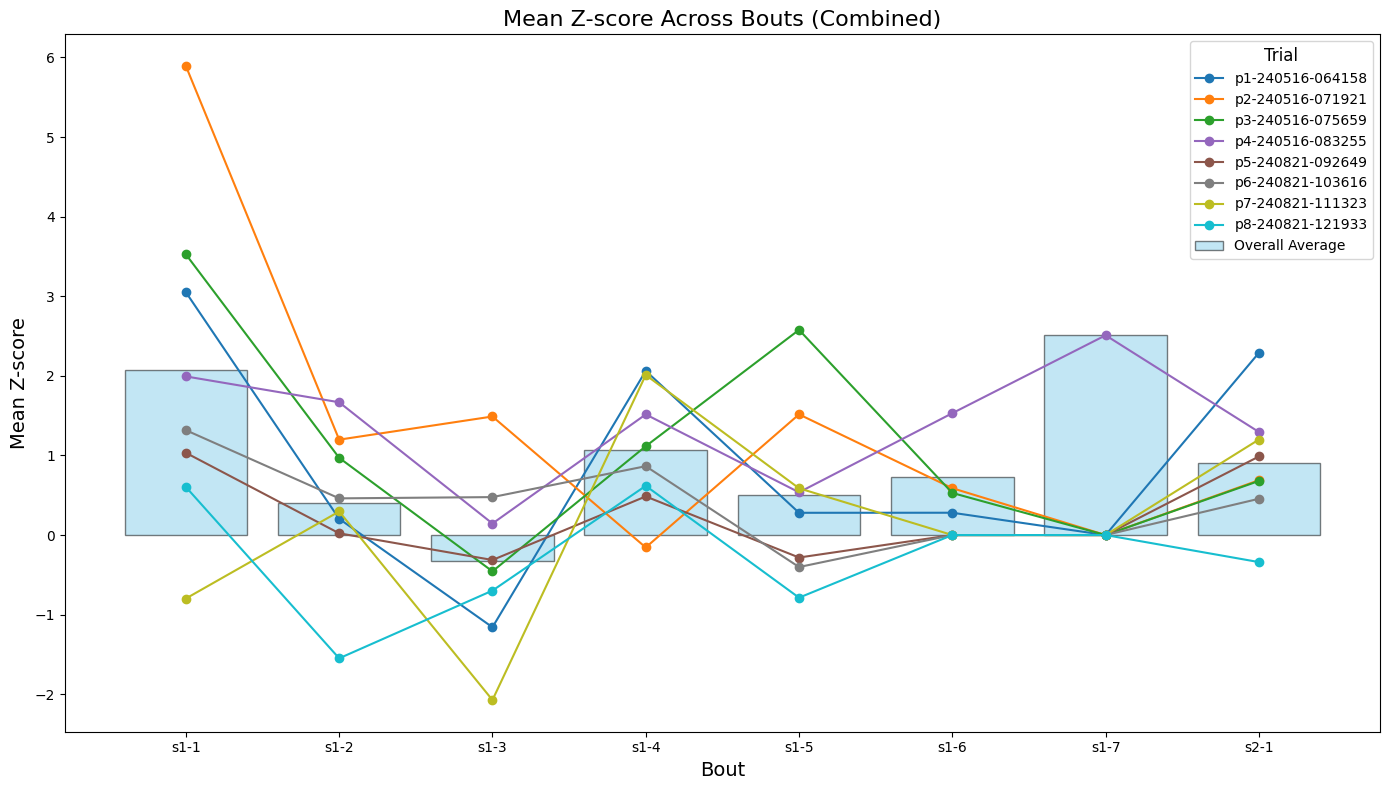

In [92]:
# plotting colors too
plot_da_metrics_color_oneplot(experiment, 
                                 metric_name="Mean Z-score", 
                                 title="Mean Z-score Across Bouts (Combined)",
                                 ylabel="Mean Z-score",
                                 xlabel="Bout",
                                 figsize=(14,8))

# messin around

/var/folders/tj/nfn3dynx2n19r7566d88xmsc0000gn/T/ipykernel_24231/1917977511.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(cmap_name, len(df.index))


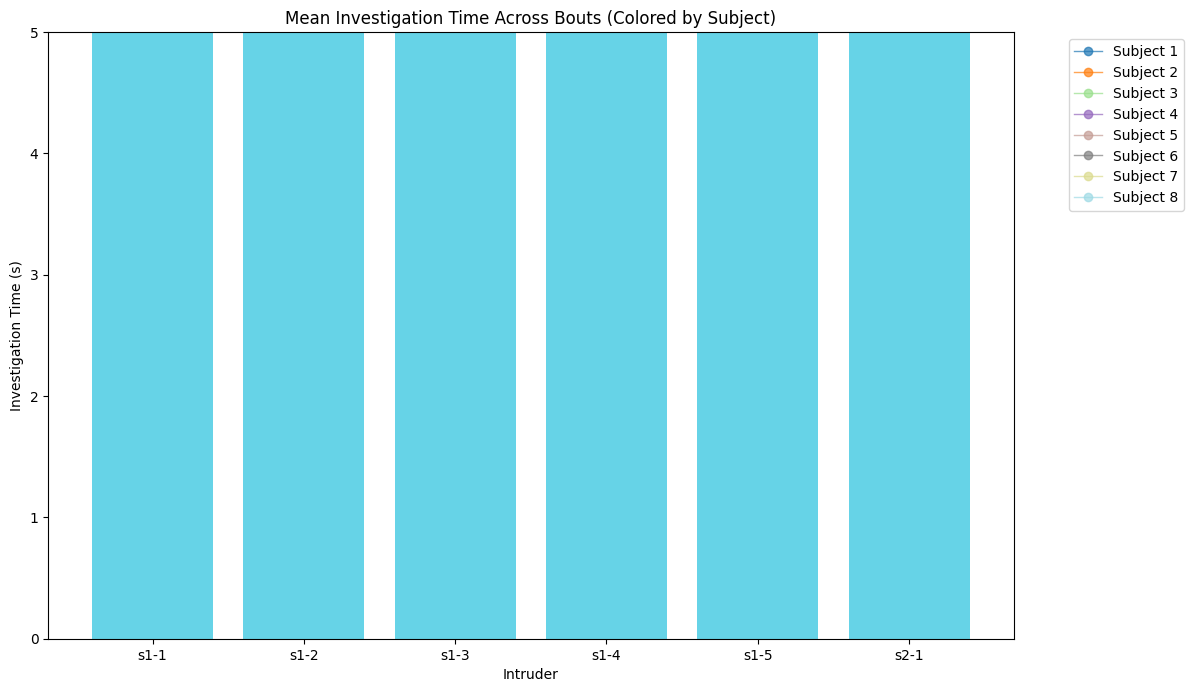

UnboundLocalError: cannot access local variable 'pivot_df' where it is not associated with a value

In [93]:
def hab_dishab_plot_y_across_bouts_colored(
    df, 
    title='Mean Across Bouts', 
    ylabel='Mean Value', 
    custom_xtick_labels=None, 
    custom_xtick_colors=None, 
    ylim=None, 
    bar_color='#00B7D7',
    yticks_increment=None, 
    xlabel='Intruder',
    figsize=(12,7), 
    pad_inches=1,
    cmap_name='tab10'
):
    """
    Plots the mean values (with SEM error bars) for each bout, plus each subject's data 
    in a unique color. The color map can be customized via `cmap_name` (e.g. 'tab10', 'tab20').
    """
    fig, ax = plt.subplots(figsize=figsize)

    # Calculate means and SEM across subjects
    means = df.mean(axis=0)
    sems = df.sem(axis=0)
    x = np.arange(len(df.columns))

    # Create a color map to get a unique color for each subject
    cmap = plt.cm.get_cmap(cmap_name, len(df.index))

    # -------------------------------------------------------
    # Plot each subject's data in a unique color + label
    # -------------------------------------------------------
    for i, idx in enumerate(df.index):
        subject_color = cmap(i)
        label = f"Subject {idx}"  # <--- ADDED: a label for the legend
        ax.plot(
            x, 
            df.loc[idx, :], 
            color=subject_color, 
            alpha=0.7, 
            marker='o', 
            linewidth=1,
            label=label             # <--- ADDED: pass the label here
        )

    # Bar chart for the means + error bars
    ax.bar(x, means, yerr=sems, color=bar_color, alpha=0.6, capsize=5)

    # Set x-axis ticks/labels
    if custom_xtick_labels is not None:
        ax.set_xticks(x)
        ax.set_xticklabels(custom_xtick_labels)
        if custom_xtick_colors is not None:
            for tick_label, c in zip(ax.get_xticklabels(), custom_xtick_colors):
                tick_label.set_color(c)
    else:
        ax.set_xticks(x)
        ax.set_xticklabels(df.columns)

    # Labels and title
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)

    # Y-axis limit
    if ylim is not None:
        ax.set_ylim(ylim)

    # Custom y-ticks increment
    if yticks_increment is not None:
        start, end = ax.get_ylim()
        ax.set_yticks(np.arange(start, end + yticks_increment, yticks_increment))

    # -------------------------------------------------------
    # ADDED LEGEND: show the subject labels
    # -------------------------------------------------------
    # You can place the legend in many ways. For example, to the right:
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    # or simply:
    # ax.legend(loc='best')

    plt.tight_layout(pad=pad_inches)
    plt.show()


# Suppose pivot_df is the DataFrame used in your plot function.
# Fill NaN with 0 for all subjects/bouts.
    pivot_df = pivot_df.fillna(0)

# Now re-plot
hab_dishab_plot_y_across_bouts_colored(
    df=pivot_df,
    title="Mean Investigation Time Across Bouts (Colored by Subject)",
    ylabel="Investigation Time (s)",
    ylim=(0, 5),
    cmap_name='tab20'
)

Bout      s1-1     s1-2    s1-3      s1-4   s1-5   s2-1
Subject                                                
1        1.399  1.96600  0.0000  0.000000  0.932  0.000
2        1.177  1.91000  0.9990  1.032500  1.399  0.000
3        1.166  0.74925  0.9655  1.487667  1.999  0.000
4        0.000  1.19900  1.7655  0.999333  0.999  1.733
6        1.599  2.49900  0.0000  2.799000  0.000  2.349


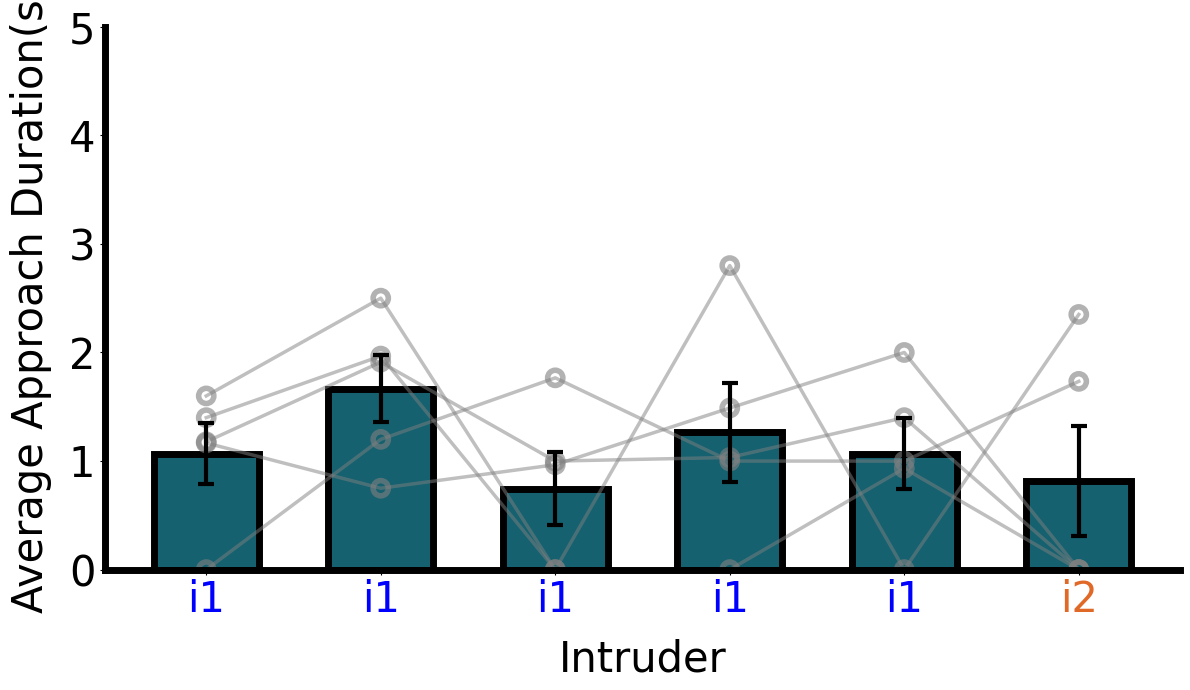

In [ ]:
# Define the desired behavior to include in the analysis
desired_behavior = "Approach"  # Change to "Investigation" if needed

# --- Create combined summary DataFrame (from your trials) ---
summary_df = create_subject_summary_df(trials)

# --- Behavior Processing for Each Subject ---
for nn in [nn1, nn2, nn3, nn4, nn5, nn6, nn7]:
    # Merge consecutive Approach events that occur within 1 second.
    nn.combine_consecutive_behaviors(behavior_name='Approach', bout_time_threshold=1)
    # Remove Approach events shorter than 0.5 seconds.
    nn.remove_short_behaviors(behavior_name='Approach', min_duration=0.5)
    
# --- Filter Summary DataFrame by Specific Bouts ---
desired_bouts = ["s1-1", "s1-2", "s1-3", "s1-4", "s1-5", "s2-1"]
filtered_summary_df = summary_df[summary_df["Bout"].isin(desired_bouts)]

# --- Filter to include only the desired behavior (e.g., Approach) ---
filtered_summary_df = filtered_summary_df[filtered_summary_df["Behavior"] == desired_behavior]

# (Optional) If you want to exclude a particular subject, e.g., Subject 5:
filtered_summary_df = filtered_summary_df[filtered_summary_df["Subject"] != 5]

# --- Group by Subject and Bout and sum Duration (s) to ensure unique pairs ---
grouped_df = filtered_summary_df.groupby(["Subject", "Bout"], as_index=False)["Duration (s)"].mean()

# --- Pivot the grouped DataFrame so that rows are subjects and columns are bouts ---
pivot_df = grouped_df.pivot(index="Subject", columns="Bout", values="Duration (s)")
pivot_df = pivot_df.fillna(0)  # Fill missing values with 0

# Now, pivot_df is ready to be passed to your plotting function.
print(pivot_df.head())

# Then call your plotting function
plot_y_across_bouts_gray(
    df=pivot_df,
    title=None,
    ylabel="Average Approach Duration(s)",
    custom_xtick_labels=["i1", "i1", "i1", "i1", "i1", "i2"],
    custom_xtick_colors=["blue", "blue", "blue", "blue", "blue", "#E06928"],
    ylim=(0, 5),
    bar_color=brain_region,
    yticks_increment=1,
    xlabel="Intruder",
    figsize=(12,7),
    pad_inches=0.1
)


/var/folders/tj/nfn3dynx2n19r7566d88xmsc0000gn/T/ipykernel_21186/1917977511.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(cmap_name, len(df.index))


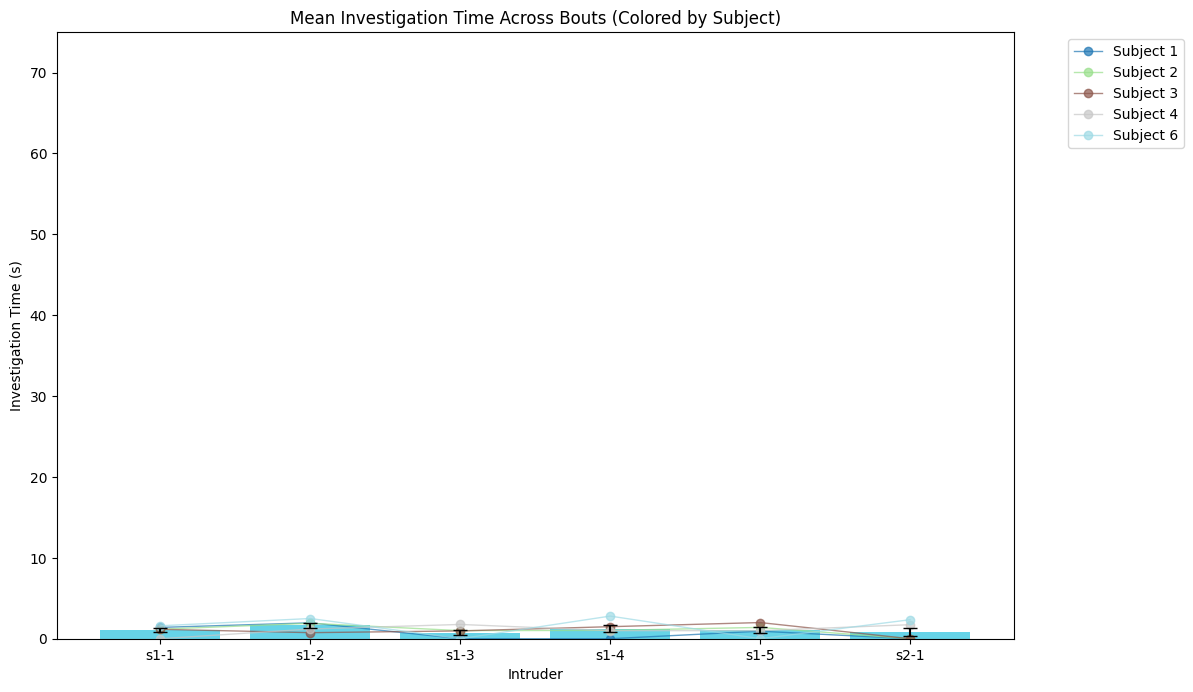

UnboundLocalError: cannot access local variable 'pivot_df' where it is not associated with a value

In [ ]:
# Suppose pivot_df is the DataFrame used in your plot function.
# Fill NaN with 0 for all subjects/bouts.
pivot_df = pivot_df.fillna(0)

# Now re-plot
hab_dishab_plot_y_across_bouts_colored(
    df=pivot_df,
    title="Mean Investigation Time Across Bouts (Colored by Subject)",
    ylabel="Investigation Time (s)",
    ylim=(0, 75),
    cmap_name='tab20'
)

In [ ]:
# new code i'm trying
filtered_summary_df = automate_investigation_workflow(
    experiment=experiment,
    trial_keys=["n1-240507-080133", "n2-240507-093913", "n3-240507-115440", 
                "n4-240507-140651", "n5-240821-085040", "n6-240821-100116", "n7-240821-114717"],
    combine_threshold=1,
    min_duration=0.5,
    desired_bouts=["s1-1", "s1-2", "s1-3", "s1-4", "s1-5", "s2-1"],
    calc_method="average"
)
# if you want to omit a subject
filtered_df = filtered_summary_df[filtered_summary_df['Subject'] != 5]


grouped_df = filtered_df.groupby(["Subject", "Bout"], as_index=False)["Duration (s)"].sum()
pivot_df = grouped_df.pivot(index="Subject", columns="Bout", values="Duration (s)")
pivot_df = pivot_df.fillna(0)  # Ensure no missing numeric values

plot_y_across_bouts_gray(
    df=pivot_df,
    title="Average Bout Duration",
    ylabel="Avg Bout Duration (s)",
    custom_xtick_labels=["i1", "i1", "i1", "i1", "i1", "i2"],
    custom_xtick_colors=["blue", "blue", "blue", "blue", "blue", "#E06928"],
    ylim=(0, 80),
    bar_color=brain_region,  # make sure brain_region is defined, e.g., brain_region = "#00B7D7"
    yticks_increment=20,
    xlabel="Intruder",
    figsize=(12,7),
    pad_inches=0.1
)

KeyError: 'Duration (s)'

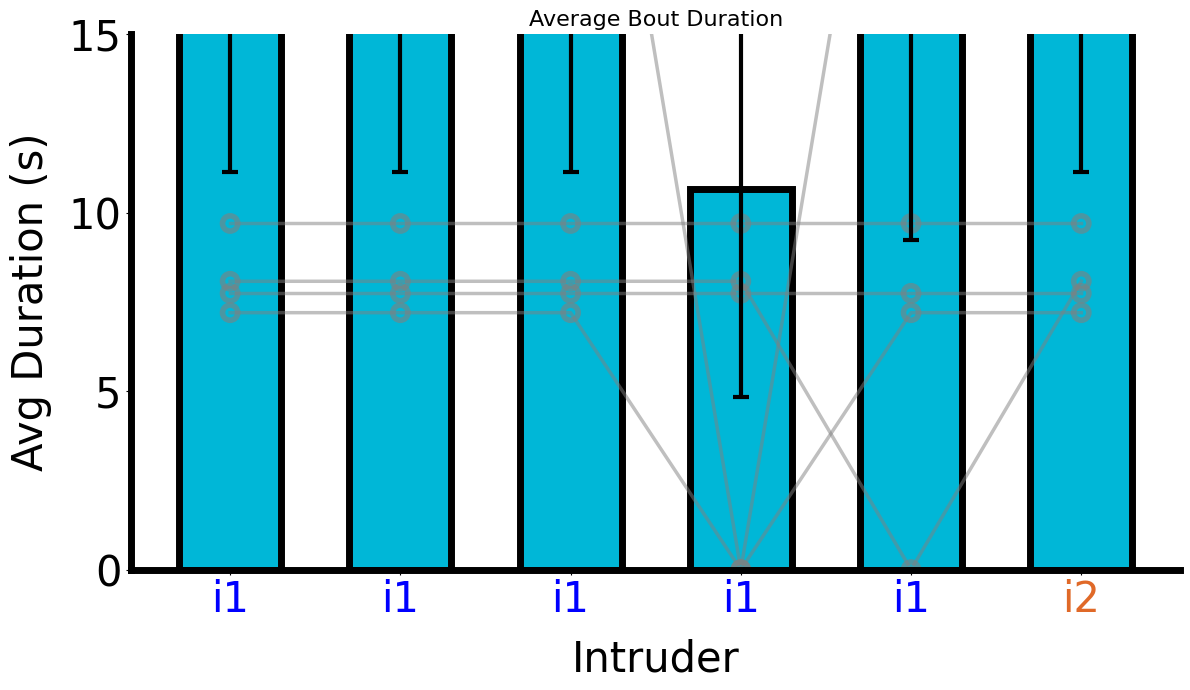

In [ ]:
# 2) Group by (Subject, Bout) and compute the MEAN
grouped_df = filtered_df.groupby(["Subject", "Bout"], as_index=False)["Duration (s)"].mean()

# 3) Pivot the grouped DataFrame (rows=subjects, cols=bouts, values=mean duration)
pivot_df = grouped_df.pivot(index="Subject", columns="Bout", values="Duration (s)")
pivot_df = pivot_df.fillna(0)  # fill missing with 0 if needed

# 4) Plot using the "Average Bout Duration" label
plot_y_across_bouts_gray(
    df=pivot_df,
    title="Average Bout Duration",
    ylabel="Avg Duration (s)",
    custom_xtick_labels=["i1", "i1", "i1", "i1", "i1", "i2"],
    custom_xtick_colors=["blue", "blue", "blue", "blue", "blue", "#E06928"],
    ylim=(0, 15),    # set an appropriate y-limit if you expect smaller values
    bar_color="#00B7D7",
    yticks_increment=5,
    xlabel="Intruder",
    figsize=(12,7),
    pad_inches=0.1
)

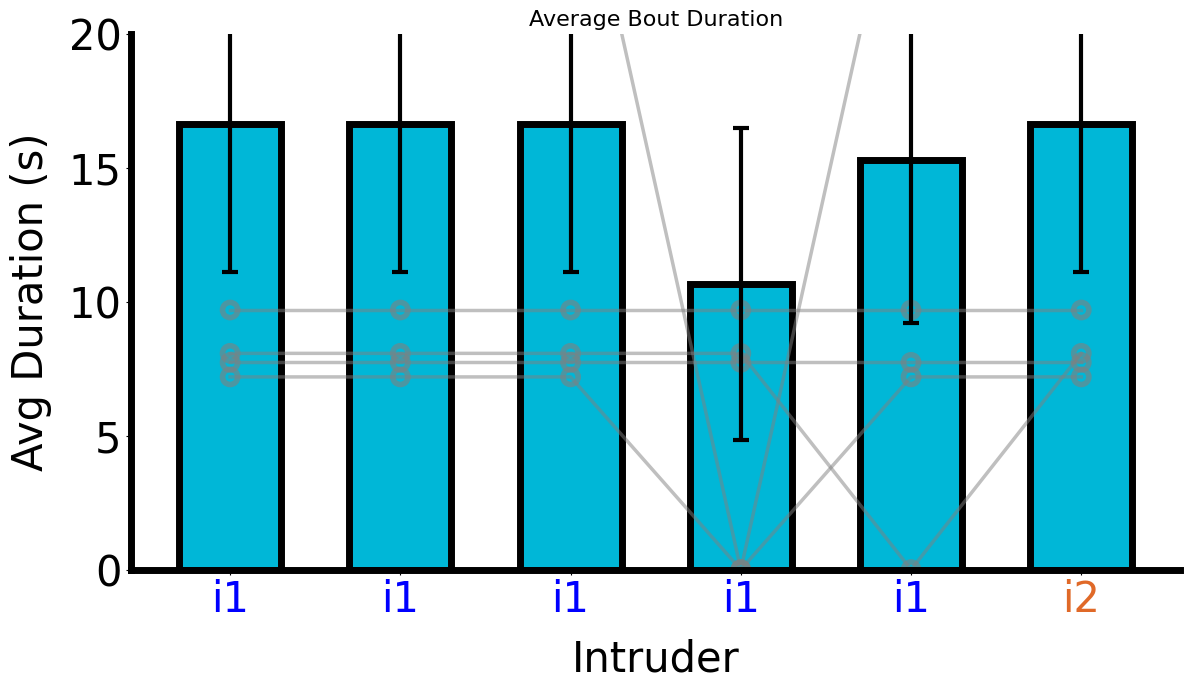

In [ ]:
# 2) Group by (Subject, Bout) and compute the MEAN
grouped_df = filtered_df.groupby(["Subject", "Bout"], as_index=False)["Duration (s)"].mean()

# 3) Pivot the grouped DataFrame (rows=subjects, cols=bouts, values=mean duration)
pivot_df = grouped_df.pivot(index="Subject", columns="Bout", values="Duration (s)")
pivot_df = pivot_df.fillna(0)  # fill missing with 0 if needed

# --- Plot the Total Investigation Time Across Bouts for the Filtered Bouts ---
plot_y_across_bouts_gray(
    df=pivot_df,
    title="Average Bout Duration",
    ylabel="Avg Duration (s)",
    custom_xtick_labels=["i1", "i1", "i1", "i1", "i1", "i2"],
    custom_xtick_colors=["blue", "blue", "blue", "blue", "blue", "#E06928"],
    ylim=(0, 20),    # set an appropriate y-limit if you expect smaller values
    bar_color="#00B7D7",
    yticks_increment=5,
    xlabel="Intruder",
    figsize=(12,7),
    pad_inches=0.1
)

In [ ]:
nn1 = experiment.trials['n1-240507-080133']
nn2 = experiment.trials['n2-240507-093913']
nn3 = experiment.trials['n3-240507-115440']
nn4 = experiment.trials['n4-240507-140651']
nn5 = experiment.trials['n5-240821-085040']
nn6 = experiment.trials['n6-240821-100116']
nn7 = experiment.trials['n7-240821-114717']

for nn in [nn1, nn2, nn3, nn4, nn5, nn6, nn7]:
    # Merge consecutive Investigation events that occur within 1 second.
    nn.combine_consecutive_behaviors(behavior_name='Investigation', bout_time_threshold=1)
    # Remove Investigation events shorter than 0.5 seconds (or adjust as needed).
    nn.remove_short_behaviors(behavior_name='Investigation', min_duration=2)

# Read each CSV into a DataFrame
df1 = nn1.behaviors
df2 = nn2.behaviors
df3 = nn3.behaviors
df4 = nn4.behaviors
df5 = nn5.behaviors
df6 = nn6.behaviors
df7 = nn7.behaviors

# Create a list of the DataFrames
trials = [df1, df2, df3, df4, df5, df6, df7]

# Create one combined summary DataFrame (7 subjects total)
summary_df = create_subject_summary_df(trials)
# --- Behavior Processing for Each Subject ---
for nn in [nn1, nn2, nn3, nn4, nn5, nn6, nn7]:
    # Merge consecutive Investigation events that occur within 1 second.
    nn.combine_consecutive_behaviors(behavior_name='Investigation', bout_time_threshold=1)
    # Remove Investigation events shorter than 0.5 seconds (or adjust as needed).
    nn.remove_short_behaviors(behavior_name='Investigation', min_duration=0.5)



# --- Combine Processed Behaviors into a Summary DataFrame ---
trials = [
    nn1.behaviors, nn2.behaviors, nn3.behaviors,
    nn4.behaviors, nn5.behaviors, nn6.behaviors, nn7.behaviors
]


summary_df = create_subject_summary_df(trials)

# --- Filter Summary DataFrame by Specific Bouts ---
desired_bouts = ["s1-1", "s1-2", "s1-3", "s1-4", "s1-5", "s2-1"]
filtered_summary_df = summary_df[summary_df["Bout"].isin(desired_bouts)]

# get rid of 5
filtered_df = filtered_summary_df[filtered_summary_df['Subject'] != 5]

# 1) Remove Subject 5
filtered_df = filtered_summary_df[filtered_summary_df['Subject'] != 5]






In [ ]:
# 1) Process each subject's DataFrame (nn1.behaviors, nn2.behaviors, etc.)
processed_dfs = []
for df in [nn1, nn2, nn3, nn4, nn5, nn6, nn7]:
    # Merge consecutive Investigation events within a 5-second threshold
    merged_df = Trial.combine_consecutive_behaviors(
        df, behavior_name='Investigation', bout_time_threshold=5
    )
    # Remove Investigation events shorter than 1 second
    short_removed_df = Trial.remove_short_behaviors(
        merged_df, behavior_name='Investigation', min_duration=1
    )
    processed_dfs.append(short_removed_df)

# 2) Combine the processed DataFrames into a single summary DataFrame
summary_df = create_subject_summary_df(processed_dfs)

# 3) Remove Subject 5 from the summary (i.e., rows where Subject == 5)
summary_df = summary_df[summary_df["Subject"] != 5]

# 4) Filter the summary DataFrame to include only the desired bouts
desired_bouts = ["s1-1", "s1-2", "s1-3", "s1-4", "s1-5", "s2-1"]
filtered_summary_df = summary_df[summary_df["Bout"].isin(desired_bouts)]

# 5) Plot the total Investigation Time across bouts, y-axis from 0 to 75
plot_behavior_metric(
    df=filtered_summary_df,
    behavior="Investigation",
    metric="investigation_time",  # or "average_bout_duration"
    title="Total Investigation Time Across Selected Bouts (All Subjects, No Subject 5)",
    ylabel="Investigation Time (s)",
    ylim=(0, 75)
)

AttributeError: 'NoneType' object has no attribute 'behaviors'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# Standalone Functions for Behavior Processing
# --------------------------
def combine_consecutive_behaviors(df, behavior_name='all', bout_time_threshold=1):
    """
    Combines consecutive behavior events if they occur within the specified time threshold.
    
    Parameters:
      df (DataFrame): Input DataFrame with columns ['Bout', 'Behavior', 'Event_Start', 'Event_End', 'Duration (s)'].
      behavior_name (str): If not 'all', only process rows matching this behavior.
      bout_time_threshold (float): Maximum gap (in seconds) allowed between consecutive events to merge them.
      
    Returns:
      DataFrame with merged events.
    """
    if df.empty:
        return df.copy()
    
    # If processing only a specific behavior, work on that subset
    if behavior_name != 'all':
        working_df = df[df['Behavior'] == behavior_name].copy()
    else:
        working_df = df.copy()
    
    # Sort by Bout, Behavior, and Event_Start to ensure proper merging
    working_df = working_df.sort_values(by=['Bout', 'Behavior', 'Event_Start']).reset_index(drop=True)
    
    combined_rows = []
    # Group by Bout and Behavior to merge events in each group
    for (bout, behavior), group in working_df.groupby(['Bout', 'Behavior']):
        group = group.sort_values('Event_Start').reset_index(drop=True)
        current_start = group.loc[0, 'Event_Start']
        current_end = group.loc[0, 'Event_End']
        
        for i in range(1, len(group)):
            next_start = group.loc[i, 'Event_Start']
            next_end = group.loc[i, 'Event_End']
            
            # If the gap between events is within threshold, merge them
            if next_start - current_end <= bout_time_threshold:
                current_end = next_end  # extend the current event
            else:
                combined_rows.append({
                    'Bout': bout,
                    'Behavior': behavior,
                    'Event_Start': current_start,
                    'Event_End': current_end,
                    'Duration (s)': current_end - current_start
                })
                # Reset to the next event
                current_start = next_start
                current_end = next_end
        
        # Append the last merged event in the group
        combined_rows.append({
            'Bout': bout,
            'Behavior': behavior,
            'Event_Start': current_start,
            'Event_End': current_end,
            'Duration (s)': current_end - current_start
        })
    
    return pd.DataFrame(combined_rows)


def remove_short_behaviors(df, behavior_name='all', min_duration=0):
    """
    Removes events with duration less than min_duration.
    
    Parameters:
      df (DataFrame): Input DataFrame with a 'Duration (s)' column.
      behavior_name (str): If not 'all', only process rows matching this behavior.
      min_duration (float): Minimum duration (in seconds) required to keep an event.
      
    Returns:
      Filtered DataFrame.
    """
    if df.empty:
        return df.copy()
    
    if behavior_name != 'all':
        working_df = df[df['Behavior'] == behavior_name].copy()
    else:
        working_df = df.copy()
    
    working_df = working_df[working_df['Duration (s)'] >= min_duration]
    return working_df.reset_index(drop=True)

# --------------------------
# Functions for Creating Summary & Plotting
# --------------------------
def create_subject_summary_df(dfs):
    """
    Takes in a list of DataFrames (each representing one subject's processed behaviors),
    assigns a unique Subject ID (1 to N) to each DataFrame, and computes:
      - Total Investigation Time = sum of "Duration (s)"
      - Average Bout Duration = total_investigation_time / number_of_bouts
    Returns a single DataFrame with columns:
      ['Bout', 'Subject', 'Behavior', 'Duration (s)',
       'Total Investigation Time', 'Average Bout Duration']
    """
    processed_list = []
    subject_id = 1
    
    for df in dfs:
        temp_df = df.copy()
        temp_df["Subject"] = subject_id
        
        total_invest_time = temp_df["Duration (s)"].sum()
        num_bouts = temp_df["Bout"].nunique()
        avg_bout_dur = total_invest_time / num_bouts if num_bouts else 0
        
        temp_df["Total Investigation Time"] = total_invest_time
        temp_df["Average Bout Duration"] = avg_bout_dur
        
        processed_list.append(temp_df)
        subject_id += 1
    
    final_df = pd.concat(processed_list, ignore_index=True)
    return final_df


def hab_dishab_plot_y_across_bouts_gray(df, 
                                        title='Mean Across Bouts', 
                                        ylabel='Mean Value', 
                                        custom_xtick_labels=None, 
                                        custom_xtick_colors=None, 
                                        ylim=None, 
                                        bar_color='#00B7D7',
                                        yticks_increment=None, 
                                        xlabel='Intruder',
                                        figsize=(12,7), 
                                        pad_inches=1):
    """
    Plots the mean values (with SEM error bars) for each bout, and overlays each subject's data in gray.
    
    Parameters:
      df (DataFrame): rows = subjects, columns = bouts, values = metric to plot.
      title, ylabel, etc.: standard plotting options.
    """
    fig, ax = plt.subplots(figsize=figsize)
    means = df.mean(axis=0)
    sems = df.sem(axis=0)
    x = np.arange(len(df.columns))
    
    # Plot each subject's data in gray
    for idx in df.index:
        ax.plot(x, df.loc[idx, :], color='gray', alpha=0.5, marker='o', linewidth=1)
    
    # Bar chart for the means + error bars
    ax.bar(x, means, yerr=sems, color=bar_color, alpha=0.6, capsize=5)
    
    # Configure x-tick labels and colors if provided
    if custom_xtick_labels is not None:
        ax.set_xticks(x)
        ax.set_xticklabels(custom_xtick_labels)
        if custom_xtick_colors is not None:
            for tick_label, c in zip(ax.get_xticklabels(), custom_xtick_colors):
                tick_label.set_color(c)
    else:
        ax.set_xticks(x)
        ax.set_xticklabels(df.columns)
    
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    
    if ylim is not None:
        ax.set_ylim(ylim)
    
    if yticks_increment is not None:
        start, end = ax.get_ylim()
        ax.set_yticks(np.arange(start, end + yticks_increment, yticks_increment))
    
    plt.tight_layout(pad=pad_inches)
    plt.show()


def plot_behavior_metric(df, 
                         behavior="Investigation", 
                         metric="investigation_time",
                         title='Mean Across Bouts',
                         ylabel='Mean Value',
                         ylim=None):
    """
    Filters the summary DataFrame by a given Behavior, then computes:
      - 'investigation_time': sum of "Duration (s)" per Subject & Bout
      - 'average_bout_duration': mean of "Duration (s)" per Subject & Bout
    Pivots to a subject-by-bout DataFrame and plots with hab_dishab_plot_y_across_bouts_gray.
    """
    filtered_df = df[df["Behavior"] == behavior].copy()
    
    if metric == "investigation_time":
        grouped = filtered_df.groupby(["Subject", "Bout"], as_index=False)["Duration (s)"].sum()
        plot_label = "Investigation Time (Sum)"
    elif metric == "average_bout_duration":
        grouped = filtered_df.groupby(["Subject", "Bout"], as_index=False)["Duration (s)"].mean()
        plot_label = "Average Bout Duration (Mean)"
    else:
        raise ValueError("metric must be either 'investigation_time' or 'average_bout_duration'")
    
    pivot_df = grouped.pivot(index="Subject", columns="Bout", values="Duration (s)")
    hab_dishab_plot_y_across_bouts_gray(
        df=pivot_df,
        title=title,
        ylabel=ylabel if ylabel else plot_label,
        ylim=ylim
    )

# --------------------------
# EXAMPLE USAGE
# --------------------------
# Assume you already have DataFrames for each subject's behaviors.
# For example, nn1.behaviors, nn2.behaviors, ... nn7.behaviors have been created elsewhere.
# Each DataFrame should include these columns:
# ['Bout', 'Behavior', 'Event_Start', 'Event_End', 'Duration (s)']

# Process each subject's behaviors (standalone, without classes)
processed_dfs = []
for df in [nn1.behaviors, nn2.behaviors, nn3.behaviors, nn4.behaviors, nn5.behaviors, nn6.behaviors, nn7.behaviors]:
    # Merge consecutive Investigation events within a 1-second threshold.
    merged_df = combine_consecutive_behaviors(df, behavior_name='Investigation', bout_time_threshold=5)
    # Remove Investigation events shorter than 0.5 seconds.
    filtered_df = remove_short_behaviors(merged_df, behavior_name='Investigation', min_duration=1)
    processed_dfs.append(filtered_df)

# Combine the processed DataFrames into a single summary DataFrame.
summary_df = create_subject_summary_df(processed_dfs)

# Filter the summary DataFrame to include only the desired bouts.
desired_bouts = ["s1-1", "s1-2", "s1-3", "s1-4", "s1-5", "s2-1"]
filtered_summary_df = summary_df[summary_df["Bout"].isin(desired_bouts)]

bouts = ['s1_1', 's1_2', 's1_3', 's1_4', 's1_5','s2_1']
custom_xtick_labels = ['i1', 'i1','i1','i1','i1','i2',]
custom_xtick_colors = ['blue', 'blue', 'blue', 'blue', 'blue', '#E06928']

# Plot the total Investigation Time across bouts with the y-axis set from 0 to 60.
plot_behavior_metric(
    df=filtered_summary_df,
    behavior="Investigation",
    metric="investigation_time",  # Alternatively, use "average_bout_duration"
    title="Total Investigation Time Across Selected Bouts (All Subjects)",
    ylabel="Investigation Time (s)",
    ylim=(0, 75)
)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plot_behavior_metric_colored(
    df=filtered_summary_df,  # The full summary DataFrame
    behavior="Investigation",
    metric="investigation_time",
    title="Mean Investigation Time Across Bouts (Colored by Subject)",
    ylabel="Investigation Time (s)",
    ylim=(0, 75),
    cmap_name='tab20'
)

In [ ]:
def hab_dishab_plot_y_across_bouts_colored(
    df, 
    title='Mean Across Bouts', 
    ylabel='Mean Value', 
    custom_xtick_labels=None, 
    custom_xtick_colors=None, 
    ylim=None, 
    bar_color='#00B7D7',
    yticks_increment=None, 
    xlabel='Intruder',
    figsize=(12,7), 
    pad_inches=1,
    cmap_name='tab10'
):
    """
    Plots the mean values (with SEM error bars) for each bout, plus each subject's data 
    in a unique color. The color map can be customized via `cmap_name` (e.g. 'tab10', 'tab20').
    """
    fig, ax = plt.subplots(figsize=figsize)

    # Calculate means and SEM across subjects
    means = df.mean(axis=0)
    sems = df.sem(axis=0)
    x = np.arange(len(df.columns))

    # Create a color map to get a unique color for each subject
    cmap = plt.cm.get_cmap(cmap_name, len(df.index))

    # -------------------------------------------------------
    # Plot each subject's data in a unique color + label
    # -------------------------------------------------------
    for i, idx in enumerate(df.index):
        subject_color = cmap(i)
        label = f"Subject {idx}"  # <--- ADDED: a label for the legend
        ax.plot(
            x, 
            df.loc[idx, :], 
            color=subject_color, 
            alpha=0.7, 
            marker='o', 
            linewidth=1,
            label=label             # <--- ADDED: pass the label here
        )

    # Bar chart for the means + error bars
    ax.bar(x, means, yerr=sems, color=bar_color, alpha=0.6, capsize=5)

    # Set x-axis ticks/labels
    if custom_xtick_labels is not None:
        ax.set_xticks(x)
        ax.set_xticklabels(custom_xtick_labels)
        if custom_xtick_colors is not None:
            for tick_label, c in zip(ax.get_xticklabels(), custom_xtick_colors):
                tick_label.set_color(c)
    else:
        ax.set_xticks(x)
        ax.set_xticklabels(df.columns)

    # Labels and title
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)

    # Y-axis limit
    if ylim is not None:
        ax.set_ylim(ylim)

    # Custom y-ticks increment
    if yticks_increment is not None:
        start, end = ax.get_ylim()
        ax.set_yticks(np.arange(start, end + yticks_increment, yticks_increment))

    # -------------------------------------------------------
    # ADDED LEGEND: show the subject labels
    # -------------------------------------------------------
    # You can place the legend in many ways. For example, to the right:
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    # or simply:
    # ax.legend(loc='best')

    plt.tight_layout(pad=pad_inches)
    plt.show()

# Filter out Subject 5 from the summary DataFrame before pivoting
filtered_df = filtered_summary_df[filtered_summary_df['Subject'] != 5]

# Re-run the analysis and plotting with the filtered data
plot_behavior_metric_colored(
    df=filtered_df,  # Now without Subject 5
    behavior="Investigation",
    metric="investigation_time",
    title="Mean Investigation Time Across Bouts (Colored by Subject, Without Subject 5)",
    ylabel="Investigation Time (s)",
    ylim=(0, 75),
    cmap_name='tab20'
)

/var/folders/tj/nfn3dynx2n19r7566d88xmsc0000gn/T/ipykernel_31048/631157042.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(cmap_name, len(df.index))


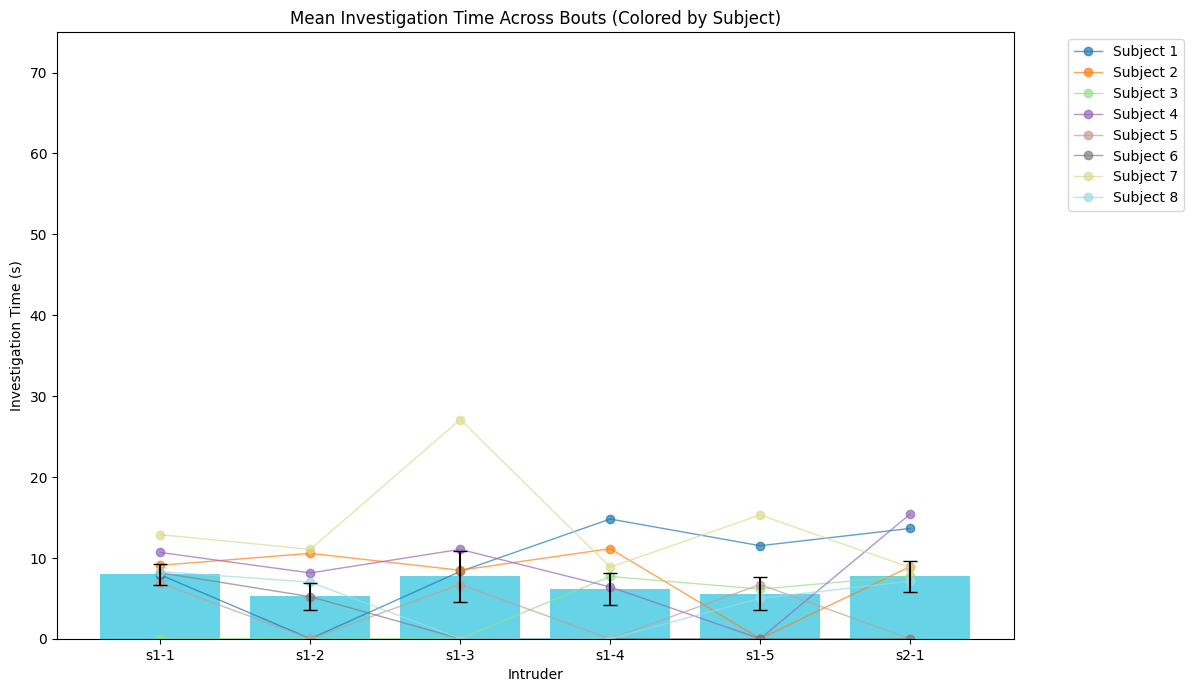

UnboundLocalError: cannot access local variable 'pivot_df' where it is not associated with a value

In [ ]:
def hab_dishab_plot_y_across_bouts_colored(
    df, 
    title='Mean Across Bouts', 
    ylabel='Mean Value', 
    custom_xtick_labels=None, 
    custom_xtick_colors=None, 
    ylim=None, 
    bar_color='#00B7D7',
    yticks_increment=None, 
    xlabel='Intruder',
    figsize=(12,7), 
    pad_inches=1,
    cmap_name='tab10'
):
    """
    Plots the mean values (with SEM error bars) for each bout, plus each subject's data 
    in a unique color. The color map can be customized via `cmap_name` (e.g. 'tab10', 'tab20').
    """
    fig, ax = plt.subplots(figsize=figsize)

    # Calculate means and SEM across subjects
    means = df.mean(axis=0)
    sems = df.sem(axis=0)
    x = np.arange(len(df.columns))

    # Create a color map to get a unique color for each subject
    cmap = plt.cm.get_cmap(cmap_name, len(df.index))

    # -------------------------------------------------------
    # Plot each subject's data in a unique color + label
    # -------------------------------------------------------
    for i, idx in enumerate(df.index):
        subject_color = cmap(i)
        label = f"Subject {idx}"  # <--- ADDED: a label for the legend
        ax.plot(
            x, 
            df.loc[idx, :], 
            color=subject_color, 
            alpha=0.7, 
            marker='o', 
            linewidth=1,
            label=label             # <--- ADDED: pass the label here
        )

    # Bar chart for the means + error bars
    ax.bar(x, means, yerr=sems, color=bar_color, alpha=0.6, capsize=5)

    # Set x-axis ticks/labels
    if custom_xtick_labels is not None:
        ax.set_xticks(x)
        ax.set_xticklabels(custom_xtick_labels)
        if custom_xtick_colors is not None:
            for tick_label, c in zip(ax.get_xticklabels(), custom_xtick_colors):
                tick_label.set_color(c)
    else:
        ax.set_xticks(x)
        ax.set_xticklabels(df.columns)

    # Labels and title
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)

    # Y-axis limit
    if ylim is not None:
        ax.set_ylim(ylim)

    # Custom y-ticks increment
    if yticks_increment is not None:
        start, end = ax.get_ylim()
        ax.set_yticks(np.arange(start, end + yticks_increment, yticks_increment))

    # -------------------------------------------------------
    # ADDED LEGEND: show the subject labels
    # -------------------------------------------------------
    # You can place the legend in many ways. For example, to the right:
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    # or simply:
    # ax.legend(loc='best')

    plt.tight_layout(pad=pad_inches)
    plt.show()


# Suppose pivot_df is the DataFrame used in your plot function.
# Fill NaN with 0 for all subjects/bouts.
    pivot_df = pivot_df.fillna(0)

# Now re-plot
hab_dishab_plot_y_across_bouts_colored(
    df=pivot_df,
    title="Mean Investigation Time Across Bouts (Colored by Subject)",
    ylabel="Investigation Time (s)",
    ylim=(0, 75),
    cmap_name='tab20'
)
